## Exploratory Data Analysis (EDA) - Linear Regression
---
**Elo notes**


In [8]:
from mpl_toolkits.basemap import Basemap

In [110]:
from __future__ import division
from scipy.stats.kde import gaussian_kde
from plotly.graph_objs import *
from pandas.tools.plotting import scatter_matrix

import statsmodels.api as sm
import plotly.plotly as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

%autoreload 2
% matplotlib inline

In [10]:
df = pd.read_csv('data/201402_trip_data.csv', parse_dates=['start_date', 'end_date'])

In [11]:
df[:2].T

,0,1
trip_id,4576,4607
duration,63,70
start_date,2013-08-29 14:13:00,2013-08-29 14:42:00
start_station,South Van Ness at Market,San Jose City Hall
start_terminal,66,10
end_date,2013-08-29 14:14:00,2013-08-29 14:43:00
end_station,South Van Ness at Market,San Jose City Hall
end_terminal,66,10
bike_#,520,661
subscription_type,Subscriber,Subscriber


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144015 entries, 0 to 144014
Data columns (total 11 columns):
trip_id              144015 non-null int64
duration             144015 non-null int64
start_date           144015 non-null datetime64[ns]
start_station        144015 non-null object
start_terminal       144015 non-null int64
end_date             144015 non-null datetime64[ns]
end_station          144015 non-null object
end_terminal         144015 non-null int64
bike_#               144015 non-null int64
subscription_type    144015 non-null object
zip_code             137885 non-null object
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 13.2+ MB


In [13]:
df.subscription_type.value_counts()

Subscriber    113647
Customer       30368
dtype: int64

In [14]:
df.subscription_type = df.subscription_type.astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144015 entries, 0 to 144014
Data columns (total 11 columns):
trip_id              144015 non-null int64
duration             144015 non-null int64
start_date           144015 non-null datetime64[ns]
start_station        144015 non-null object
start_terminal       144015 non-null int64
end_date             144015 non-null datetime64[ns]
end_station          144015 non-null object
end_terminal         144015 non-null int64
bike_#               144015 non-null int64
subscription_type    144015 non-null category
zip_code             137885 non-null object
dtypes: category(1), datetime64[ns](2), int64(5), object(3)
memory usage: 12.2+ MB


---
NULL values represent missing unknown data.
 

In [16]:
df.duration.isnull().count()

144015

In [17]:
df.duration.isnull().sum()

0

In [18]:
df.duration.isnull().value_counts()

False    144015
dtype: int64

In [19]:
df.apply(lambda x : x.isnull().sum())

trip_id                 0
duration                0
start_date              0
start_station           0
start_terminal          0
end_date                0
end_station             0
end_terminal            0
bike_#                  0
subscription_type       0
zip_code             6130
dtype: int64

In [20]:
df['month'] = pd.DatetimeIndex(df.start_date).month

In [21]:
df['dow'] = pd.DatetimeIndex(df.start_date).dayofweek

In [22]:
df['date'] = pd.DatetimeIndex(df.start_date).date

In [23]:
df['hour'] = pd.DatetimeIndex(df.start_date).hour

In [24]:
df['day'] = pd.DatetimeIndex(df.start_date).day

In [25]:
df[:2].T

,0,1
trip_id,4576,4607
duration,63,70
start_date,2013-08-29 14:13:00,2013-08-29 14:42:00
start_station,South Van Ness at Market,San Jose City Hall
start_terminal,66,10
end_date,2013-08-29 14:14:00,2013-08-29 14:43:00
end_station,South Van Ness at Market,San Jose City Hall
end_terminal,66,10
bike_#,520,661
subscription_type,Subscriber,Subscriber


In [26]:
monthly_rides = df.groupby(df.month).trip_id.count()
monthly_rides[:2] # it's a df

month
1    24428
2    19024
Name: trip_id, dtype: int64

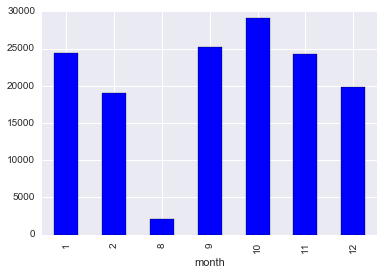

In [27]:
monthly_rides.plot(kind='bar');

In [28]:
mr = monthly_rides.reset_index() # we need the months mr --> monthly_rides
mr

,month,trip_id
0,1,24428
1,2,19024
2,8,2102
3,9,25243
4,10,29105
5,11,24219
6,12,19894


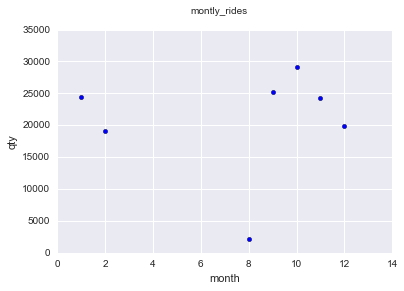

In [30]:
plt.scatter(mr.month, mr.trip_id);
plt.suptitle('montly_rides')
plt.xlabel('month')
plt.ylabel('qty');

In [31]:
daily_rides= df.groupby(df.date).trip_id.count()

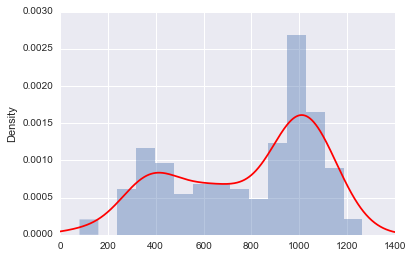

In [32]:
daily_rides.hist(bins=15, normed=True, edgecolor='none', alpha=0.4)
daily_rides.plot(kind='kde', c='r')
_ = plt.xlim(0,1400)

In [33]:
weekday_daily_counts = df[df['dow'] >= 5].groupby('date').trip_id.count()
weekend_daily_counts = df[df['dow'] < 5].groupby('date').trip_id.count()

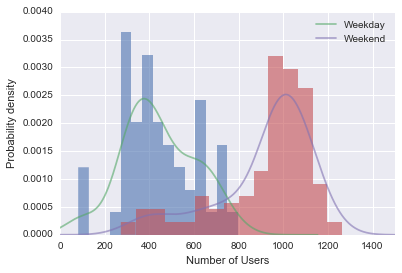

In [34]:
weekday_daily_counts.hist(bins=15, alpha=.6, normed=True, edgecolor='none')
weekday_daily_counts.plot(kind='kde', alpha=.6, label='Weekday')

weekend_daily_counts.hist(bins=15, alpha=.6, normed=True, edgecolor='none')
weekend_daily_counts.plot(kind='kde', alpha=.6, label='Weekend')

_ = plt.xlim(0,1500)

plt.xlabel('Number of Users')
plt.ylabel('Probability density')

plt.legend()
plt.show()


Now I am going to explore hourly trends of user activity. Group the bike rides by date and hour and count the number of rides in the given hour on the given date. Make a boxplot of the hours in the day (x) against the number of users (y) in that given hour.



/Users/eloisaelias/anaconda/lib/python2.7/site-packages/pandas/core/index.py:4072: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



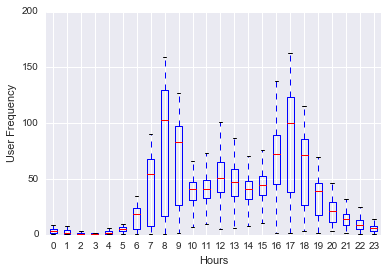

In [35]:
ax = df.groupby(['date', 'hour']).trip_id.count().unstack().boxplot(return_type='axes')
ax.set_ylim(top=200)
ax.grid=False
ax.set_xlabel('Hours')
ax.set_ylabel('User Frequency');


There are two types of bike users (specified by column Subscription Type: Subscriber and Customer. Given this information and the weekend and weekday categorization, plot and inspect the user activity trends. Suppose the product team wants to run a promotional campaign, what is my suggestions in terms of who the promotion should apply to and when it should apply for the campaign to be effective?

In [36]:
weekday = df[df.dow < 5]
weekend = df[df.dow >= 5]

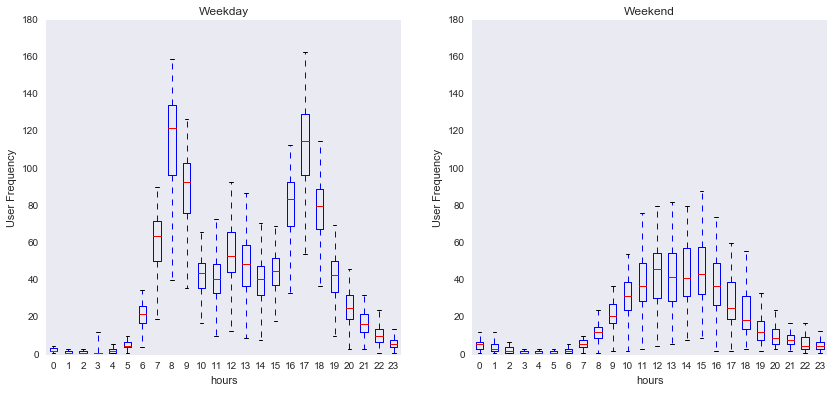

In [37]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
weekday.groupby(['date', 'hour']).trip_id.count().unstack().boxplot(ax=axes[0], return_type='axes')
weekend.groupby(['date', 'hour']).trip_id.count().unstack().boxplot(ax=axes[1], return_type='axes')

for ax in axes:
    ax.grid(False)
    ax.set_xlabel('hours')
    ax.set_ylabel('User Frequency')
    ax.set_ylim(0,180)

axes[0].set_title('Weekday')
axes[1].set_title('Weekend')

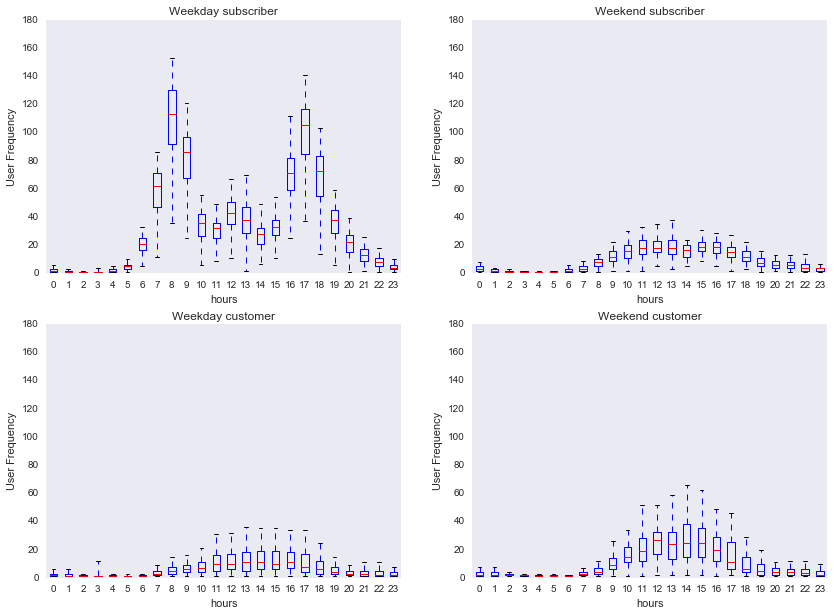

In [38]:
weekday_sub = weekday[weekday.subscription_type == 'Subscriber']
weekend_sub = weekend[weekend.subscription_type == 'Subscriber']

weekday_cust = weekday[weekday.subscription_type == 'Customer']
weekend_cust = weekend[weekend.subscription_type == 'Customer']


data = [weekday_sub, weekend_sub, weekday_cust, weekend_cust]
title = ['Weekday subscriber', 'Weekend subscriber', 'Weekday customer', 'Weekend customer']

fig, axes = plt.subplots(2,2, figsize=(14,10))

for  ax, d, t in zip(axes.ravel(), data, title):
    d.groupby(['date', 'hour']).trip_id.count().unstack().boxplot(ax=ax, return_type='axes')
    ax.grid(False)
    ax.set_ylim(top=180)
    ax.set_xlabel('hours')
    ax.set_ylabel('User Frequency')
    ax.set_title(t)


According with the data, I would suggest the promotional campaign to be held during week days during 8am - 10am and 5pm - 7pm, and on weekends during 12pm to 5pm. The former period has more subscribers and the second has more customers.

In [39]:
df.subscription_type.value_counts()

Subscriber    113647
Customer       30368
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144015 entries, 0 to 144014
Data columns (total 16 columns):
trip_id              144015 non-null int64
duration             144015 non-null int64
start_date           144015 non-null datetime64[ns]
start_station        144015 non-null object
start_terminal       144015 non-null int64
end_date             144015 non-null datetime64[ns]
end_station          144015 non-null object
end_terminal         144015 non-null int64
bike_#               144015 non-null int64
subscription_type    144015 non-null category
zip_code             137885 non-null object
month                144015 non-null int32
dow                  144015 non-null int32
date                 144015 non-null object
hour                 144015 non-null int32
day                  144015 non-null int32
dtypes: category(1), datetime64[ns](2), int32(4), int64(5), object(4)
memory usage: 15.5+ MB


In [282]:
#df_daily_count[:2]

In [283]:
#df_daily_count.index

In [284]:
#pd.DatetimeIndex(df_daily_count.index).month

### Normal process variation X-R graph

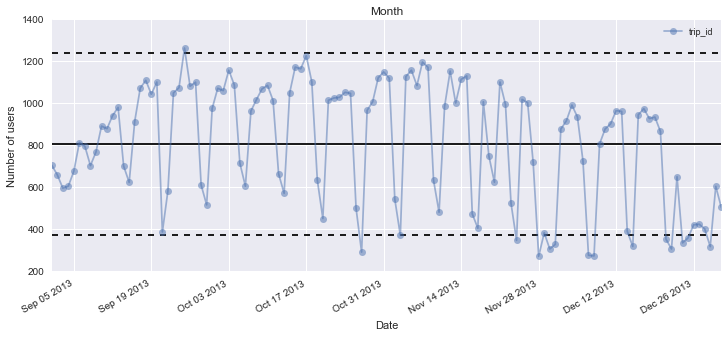

In [43]:
sepdec = [9, 10, 11, 12]
df_fall = df[df.month.isin(sepdec)]
df_daily_count = df_fall.groupby('date').trip_id.count()

fig, ax = plt.subplots(1, figsize=(12,5))

df_daily_count.plot(ax=ax, linestyle='-', marker='o', alpha=0.5, grid=True, legend=False)


sepdec_mean = df_daily_count.mean()
sepdec_std = df_daily_count.std()

ax.hlines(sepdec_mean, *plt.xlim())
ax.hlines(sepdec_mean + (1.5*sepdec_std), *plt.xlim(), linestyle='--')
ax.hlines(sepdec_mean - (1.5*sepdec_std), *plt.xlim(), linestyle='--')

ax.set_xlabel('Date')
ax.set_ylabel('Number of users')

fig.autofmt_xdate()

ax.legend(fontsize=9, frameon=False)
ax.set_title('Month');

In [306]:
#df_daily_count[:2]

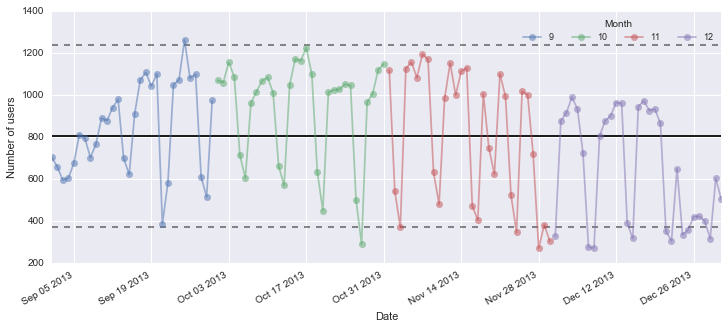

In [44]:
sepdec = [9, 10, 11, 12]
df_fall = df[df.month.isin(sepdec)]
df_daily_count_stats = df_fall.groupby('date').trip_id.count()
df_daily_count = (df_fall.groupby(['month', 'date']).trip_id.count().unstack().T) # pivoting month into columns in order to separate the dates per months.

fig, ax = plt.subplots(1, figsize=(12,5))

df_daily_count.plot(ax=ax, linestyle='-', markeredgecolor='none', marker='o', alpha=0.5, grid=True, legend=False)

sepdec_mean = df_daily_count_stats.mean()
sepdec_std = df_daily_count_stats.std()

ax.hlines(sepdec_mean, *plt.xlim())
ax.hlines(sepdec_mean + (1.5*sepdec_std), *plt.xlim(), linestyle='--', alpha=0.5)
ax.hlines(sepdec_mean - (1.5*sepdec_std), *plt.xlim(), linestyle='--', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Number of users')

fig.autofmt_xdate()

label = ax.legend(fontsize=9, ncol=4, frameon=False)
label.set_title('Month')
plt.show();

In [45]:
df_station = pd.read_csv('data/201402_station_data.csv')

In [46]:
df_station[:2]

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013


In [47]:
df[:2]

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscription_type,zip_code,month,dow,date,hour,day
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,8,3,2013-08-29,14,29
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,8,3,2013-08-29,14,29


In [48]:
full = df.merge(df_station, left_on=['start_terminal', 'start_station'], right_on=['station_id', 'name'])

In [49]:
full[:2].T

,0,1
trip_id,4576,4299
duration,63,83
start_date,2013-08-29 14:13:00,2013-08-29 12:02:00
start_station,South Van Ness at Market,South Van Ness at Market
start_terminal,66,66
end_date,2013-08-29 14:14:00,2013-08-29 12:04:00
end_station,South Van Ness at Market,Market at 10th
end_terminal,66,67
bike_#,520,319
subscription_type,Subscriber,Subscriber


In [50]:
full['counts'] = 1

In [51]:
full['counts'] = (full['counts'] * 1.) / full.dockcount  # Adjust usage by the dockcount to prepare to compute the usage of each station

In [52]:
#full = full.drop('counts', 1)

In [68]:
# [[]] doble brakets means columns
grouped_stations = full.groupby(['start_station', 'lat', 'long']).sum()[['counts']].reset_index()
grouped_stations[:5]

,start_station,lat,long,counts
0,2nd at Folsom,37.785299,-122.396236,198.736842
1,2nd at South Park,37.782259,-122.392738,297.200000
2,2nd at Townsend,37.780526,-122.390288,184.703704
3,5th at Howard,37.781752,-122.405127,175.666667
4,Adobe on Almaden,37.331415,-121.893200,17.631579


In [61]:
grouped_stations.lat.max()

37.80477

In [62]:
grouped_stations.lat.min()

37.329732

In [66]:
grouped_stations.long.max()

-121.877349

In [64]:
grouped_stations.long.min()

-122.418954

In [55]:
normalized_counts = grouped_stations['counts'] / (grouped_stations['counts'].max())


In [56]:
text = ['{},{}'.format(station, count * 100) for station, count in zip(grouped_stations.start_station, normalized_counts)]

In [57]:
# data = Data([Scatter(x=grouped_stations['long'],
#                     y=grouped_stations['lat'],
#                     mode='markers',
#                     marker=Marker(opacity=normalized_counts, size=normalized_counts * 100),
#                     text=txt)])
# py.iplot(data)

In [58]:
grouped_stations_byname = full.groupby('name')['lat', 'long','dockcount']

In [59]:
station_lat_log = grouped_stations_byname.first()

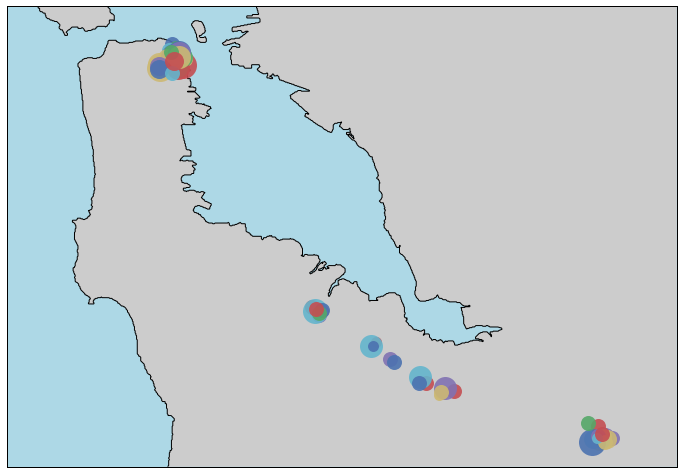

In [60]:
fig, ax = plt.subplots(figsize=(12,12))

mapa = Basemap(ax=ax, projection='cyl',
              llcrnrlat=37.3, llcrnrlon=-122.6,
              urcrnrlat=37.85, urcrnrlon=-121.8,
              resolution='f')

mapa.drawmapboundary(fill_color='lightblue')
mapa.drawcoastlines()
mapa.drawstates()
mapa.fillcontinents()

for st, longlat in station_lat_log.iterrows():
    mapa.plot(longlat['long'], longlat['lat'], '.', markersize=longlat['dockcount']*2, alpha=0.9, latlon=True)
    

### Linear Regression

Linear regression is an approach to modeling the relationship between a continuous dependent (y) variable and one or more continuous independent (x) variables. Here I will be introducing you to fitting the model and interpreting the results.

1. I will be using the `prestige` data in `statsmodels`. `statsmodels` is the de facto library for performing regression tasks in Python. Load the data with the follow code. Remember to add a column of `1` to the x matrix for the model to fit the intercept.

In [111]:
df_prestige = sm.datasets.get_rdataset('Duncan', 'car', cache=True).data 

In [112]:
df_prestige[:2]

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83


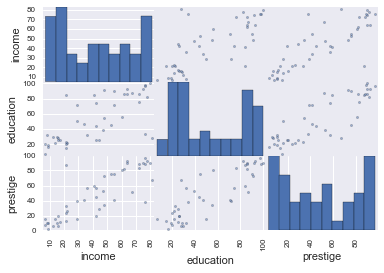

In [114]:
scatter_matrix(df_prestige);

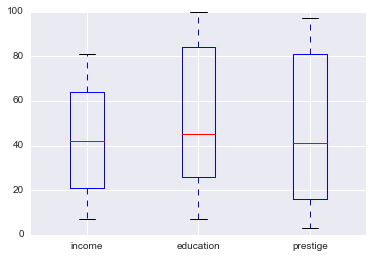

In [120]:
df_prestige.boxplot();

In [115]:
# y = df_prestige.pop('prestige')
y = df_prestige.prestige

In [116]:
y[:2]

accountant    82
pilot         83
Name: prestige, dtype: int64

In [117]:
x = df_prestige[['income', 'education']].astype(float)
x[:4]

,income,education
accountant,62,86
pilot,72,76
architect,75,92
author,55,90


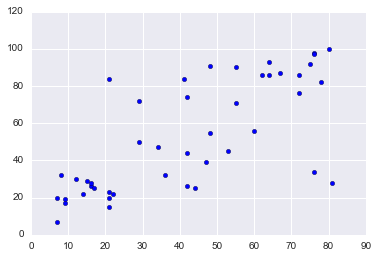

In [118]:
plt.scatter(x.income, x.education)

In [157]:
x= sm.add_constant(x)

In [159]:
x[:2]

,income,education,const
accountant,62,86,1
pilot,72,76,1


---
Maximum Likelihood Estimation MLE
---
In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of a statistical model given observations, by finding the parameter values that maximize the likelihood of making the observations given the parameters.

The method of maximum likelihood corresponds to many well-known estimation methods in statistics. For example, one may be interested in the heights of adult female penguins, but be unable to measure the height of every single penguin in a population due to cost or time constraints. Assuming that the heights are normally distributed with some unknown mean and variance, the mean and variance can be estimated with MLE while only knowing the heights of some sample of the overall population. MLE would accomplish this by taking the mean and variance as parameters and finding particular parametric values that make the observed results the most probable given the model.

The method of maximum likelihood estimates $θ_0$ by finding a value of $θ$ that maximizes ${\displaystyle {\hat {\ell }}(\theta ;x)}$. This method of estimation defines a maximum likelihood estimator (MLE) of $θ_0$:

$\{{\hat {\theta }}_{\mathrm {mle} }\}\subseteq \{{\underset {\theta \in \Theta }{\operatorname {arg\,max} }}\ {\hat {\ell }}(\theta \,;\,x_{1},\ldots ,x_{n})\}$

if a maximum exists. An MLE estimate is the same regardless of whether we maximize the likelihood or the log-likelihood function, since log is a monotonically increasing function.

---
Ordinary Least Squares (OLS)
---

In statistics, ordinary least squares (OLS) or linear least squares is a method for estimating the unknown parameters in a linear regression model, with the goal of minimizing the sum of the squares of the differences between the observed responses in the given dataset and those predicted by a linear function of a set of explanatory variables (visually this is seen as the sum of the vertical distances between each data point in the set and the corresponding point on the regression line – the smaller the differences, the better the model fits the data). 


The OLS estimator is consistent when the regressors are exogenous, and optimal in the class of linear unbiased estimators when the errors are homoscedastic and serially uncorrelated.

Under the additional assumption that the errors be normally distributed, OLS is the maximum likelihood estimator. 


$y_{i}=\beta _{1}x_{i1}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}=\mathbf {x} _{i}^{\rm {T}}{\boldsymbol {\beta }}+\varepsilon _{i},\qquad i=1,\ldots ,n,$


$y_{i}=\hat{y}=\mathbf {x} _{i}^{\rm {T}}{\boldsymbol {\beta }}+\varepsilon _{i},\qquad$

where T denotes the transpose, so that $x_i^Tβ$ is the inner product between vectors $xi$ and $β$.

Often these n equations are stacked together and written in vector form as

$\mathbf {y} =\mathbf {X} {\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }},\,$

where

 $\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad$
 
 $\mathbf{X} = \begin{pmatrix} \mathbf{x}^{\rm T}_1 \\ \mathbf{x}^{\rm T}_2 \\ \vdots \\ \mathbf{x}^{\rm T}_n \end{pmatrix}
 = \begin{pmatrix} x_{11} & \cdots & x_{1p} \\
 x_{21} & \cdots & x_{2p} \\
 \vdots & \ddots & \vdots \\
 x_{n1} & \cdots & x_{np}
 \end{pmatrix}, $
 
 
 $\boldsymbol\beta = \begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{pmatrix}, \quad
 \boldsymbol\varepsilon = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{pmatrix}.$
 


Some remarks on terminology and general use:

$y_{i}$, is called the regressand, endogenous variable, response variable, measured variable, criterion variable, or dependent variable 

$x_{i1},\,x_{i2},\,\ldots ,\,x_{ip}$, are called regressors, exogenous variables, explanatory variables, covariates, input variables, predictor variables, or independent variables. The matrix $\mathbf {X}$ is sometimes called the design matrix.

Usually a constant is included as one of the regressors. For example, we can take xi1 = 1 for i = 1, ..., n. The corresponding element of β is called the intercept. Many statistical inference procedures for linear models require an intercept to be present, so it is often included even if theoretical considerations suggest that its value should be zero.

Sometimes one of the regressors can be a non-linear function of another regressor or of the data, as in polynomial regression and segmented regression. The model remains linear as long as it is linear in the parameter vector β.
       
${\boldsymbol {\beta }}$, is a p-dimensional parameter vector. Its elements are also called effects, or regression coefficients. Statistical estimation and inference in linear regression focuses on $β$. The elements of this parameter vector are interpreted as the partial derivatives of the dependent variable with respect to the various independent variables.

$\varepsilon _{i}$, is called the error term, disturbance term, or noise. This variable captures all other factors which influence the dependent variable $y_i$ other than the regressors $x_i$. The relationship between the error term and the regressors, for example whether they are correlated, is a crucial step in formulating a linear regression model, as it will determine the method to use for estimation.


Such a system usually has no solution, so the goal is instead to find the coefficients ${\beta }$ which fit the equations "best," in the sense of solving the quadratic minimization problem




**Estimation**


The objective consists of adjusting the parameters of a model function to best fit a data set. A simple data set consists of n points (data pairs) $(x_{i},y_{i})\!, i = 1, ..., n,$ where $x_{i}$ is an independent variable and $y_{i}$ is a dependent variable whose value is found by observation. The model function has the form f $f(x,\beta )$, where m adjustable parameters are held in the vector $\boldsymbol {\beta }$. The goal is to find the parameter values for the model that "best" fits the data. The least squares method finds its optimum when the sum, S, of squared residuals

${S=\sum _{i=1}^{n}{r_{i}}^{2}}$

is a minimum. A residual is defined as the difference between the actual value of the dependent variable and the value predicted by the model. Each data point has one residual. Both the sum and the mean of the residuals are equal to zero.

$r_{i}=y_{i}-f(x_{i},{\boldsymbol \beta })$

An example of a model is that of the straight line in two dimensions. Denoting the y-intercept as $\beta _{0}$ and the slope as $\beta _{1}$, the model function is given by $f(x,\boldsymbol \beta)=\beta_0+\beta_1 x.$ 

**Least Square Criterion**

$\min \sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $ 


where:

$ SS_\text{res}=\sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $  The sum of squares of residuals, also called the residual sum of squares

**Now**

Suppose $b$ is a "candidate" value for the parameter $\beta$. The quantity $y_i − x_i^Tb$, called the **residual** for the $i-th$ observation, measures the vertical distance between the data point $(xi yi)$ and the hyperplane $y = x^Tb$, and thus assesses the degree of fit between the actual data and the model. The **sum of squared residuals (SSR)** (also called the **error sum of squares (ESS)** or **residual sum of squares (RSS)**)is a measure of the overall model fit:

$S(b)=\sum _{i=1}^{n}(y_{i}-x_{i}^{T}b)^{2}=(y-Xb)^{T}(y-Xb)$


Where $T$ denotes the matrix transpose. The value of b which minimizes this sum is called the **OLS estimator for β**. The function $S(b)$ is quadratic in b with positive-definite Hessian, and therefore this function possesses a unique global minimum at $b={\hat {\beta }}$, which can be given by the explicit formula:

${\displaystyle {\hat {\beta }}=\operatorname {argmin} _{b\in \mathbb {R} ^{p}}S(b)=\left({\frac {1}{n}}\sum _{i=1}^{n}x_{i}x_{i}^{T}\right)^{\!-1}\!\!\cdot \,{\frac {1}{n}}\sum _{i=1}^{n}x_{i}y_{i}}$

or equivalently in matrix form,

${\hat {\beta }}=(X^{T}X)^{-1}X^{T}y$ 


The matrix $ {\displaystyle (X^{T}X)^{-1}X^{T}}$ is called the Moore–Penrose pseudoinverse matrix of $X$. This formulation highlights the point that estimation can be carried out if, and only if, there is no perfect multicollinearity between the explanatory variables.

After we have estimated $β$, the fitted values (or predicted values) from the regression will be

$ {\hat {y}}=X{\hat {\beta }}=Py$

where $P = X(X^TX)^−1X^T $is the projection matrix onto the space $V$ spanned by the columns of $X$. This matrix $P$ is also sometimes called the **hat matrix** because it "puts a hat" onto the variable $y$. Another matrix, closely related to $P$ is the annihilator matrix $M = In − P$, this is a projection matrix onto the space orthogonal to $V$. Both matrices $P$ and $M$ are symmetric and idempotent (meaning that $P2 = P$), and relate to the data matrix $X$ via identities $PX = X and MX = 0.$ Matrix $M$ creates the residuals from the regression:

${\displaystyle {\hat {\varepsilon }}=y-{\hat {y}}=y-X{\hat {\beta }}=My=M(X\beta +\varepsilon )=(MX)\beta +M\varepsilon =M\varepsilon .}$

Using these residuals we can estimate the value of $σ2$:

${\displaystyle s^{2}={\frac {{\hat {\varepsilon }}^{T}{\hat {\varepsilon }}}{n-p}}={\frac {(My)^{T}My}{n-p}}={\frac {y^{T}M^{T}My}{n-p}}={\frac {y^{T}My}{n-p}}={\frac {S({\hat {\beta }})}{n-p}},\qquad {\hat {\sigma }}^{2}={\frac {n-p}{n}}\;s^{2}}$

The numerator, $n−p$, is the statistical degrees of freedom. The first quantity, $s2$, is the $OLS$ estimate for $σ2$, whereas the second, $ \scriptstyle {\hat {\sigma }}^{2},$ is the $MLE$ estimate for $σ2$. The two estimators are quite similar in large samples; the first one is always unbiased, while the second is biased but minimizes the mean squared error of the estimator. In practice s2 is used more often, since it is more convenient for the hypothesis testing. The square root of $s2$ is called the **standard error of the regression (SER), or standard error of the equation (SEE)**.

It is common to assess the goodness-of-fit of the OLS regression by comparing how much the initial variation in the sample can be reduced by regressing onto $X$. The coefficient of determination $R2$ is defined as a ratio of "explained" variance to the "total" variance of the dependent variable y:

$R^{2}={\frac {\sum ({\hat {y}}_{i}-{\overline {y}})^{2}}{\sum (y_{i}-{\overline {y}})^{2}}}={\frac {y^{T}P^{T}LPy}{y^{T}Ly}}=1-{\frac {y^{T}My}{y^{T}Ly}}=1-{\frac {\rm {SSR}}{\rm {TSS}}}$

Where TSS is the **total sum of squares** for the dependent variable, $L = In − 11T/ n$, and $1$ is an $n×1$ vector of ones. ($L$ is a "centering matrix" which is equivalent to regression on a constant; it simply subtracts the mean from a variable.) In order for $R2$ to be meaningful, the matrix $X$ of data on regressors must contain a column vector of ones to represent the constant whose coefficient is the regression intercept. In that case, $R2$ will always be a number between $0$ and $1$, with values close to 1 indicating a good degree of fit.

---
Normal Equation (Linear least squares)
---


The "Normal Equation" is a method of finding the optimum theta without iteration.

There is no need to do feature scaling with the normal equation.

Linear least squares is the problem of approximately solving an overdetermined system of linear equations, where the best approximation is defined as that which minimizes the sum of squared differences between the data values and their corresponding modeled values. 
Define the  $ith$ residual to be:

$r_i = y_{i}-\sum _{j=1}^{n}X_{ij}\beta _{j}$



An overdetermined system

$\sum _{j=1}^{n}X_{ij}\beta _{j}=y_{i},\ (i=1,2,\dots ,m)$

of m linear equations in n unknown coefficients, $β1,β2,…,βn, with m > n.$ (Note: for a linear model as above, not all of $X$ contains information on the data points. The first column is populated with ones, ${\displaystyle X_{i1}=1}$, only the other columns contain actual data, and $n = number of regressors + 1$). This can be written in matrix form as

$\mathbf {X} {\boldsymbol {\beta }}=\mathbf {y}$

where

${\displaystyle \mathbf {X} ={\begin{bmatrix}X_{11}&X_{12}&\cdots &X_{1n}\\X_{21}&X_{22}&\cdots &X_{2n}\\\vdots &\vdots &\ddots &\vdots \\X_{m1}&X_{m2}&\cdots &X_{mn}\end{bmatrix}},\qquad {\boldsymbol {\beta }}={\begin{bmatrix}\beta _{1}\\\beta _{2}\\\vdots \\\beta _{n}\end{bmatrix}},\qquad \mathbf {y} ={\begin{bmatrix}y_{1}\\y_{2}\\\vdots \\y_{m}\end{bmatrix}}.}$

Such a system usually has no solution, so the goal is instead to find the coefficients ${\boldsymbol {\beta }}$ which fit the equations "best," in the sense of solving the quadratic minimization problem

$ {\hat {\boldsymbol {\beta }}}={\underset {\boldsymbol {\beta }}{\operatorname {arg\,min} }}\,S({\boldsymbol {\beta }})$

where the objective function S is given by

$ S({\boldsymbol {\beta }})= SSR =  \sum _{i=1}^{m}{\bigl |}y_{i}-\sum _{j=1}^{n}X_{ij}\beta _{j}{\bigr |}^{2}={\bigl \|}\mathbf {y} -\mathbf {X} {\boldsymbol {\beta }}{\bigr \|}^{2}$


**Least Square Criterion**

$\min \sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $ 


where:

$ SS_\text{res}=\sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $  The sum of squares of residuals, also called the residual sum of squares




A justification for choosing this criterion is given in properties below. This minimization problem has a unique solution, provided that the n columns of the matrix $\mathbf {X}$ are linearly independent, given by solving the normal equations

$(\mathbf {X} ^{\rm {T}}\mathbf {X} ){\hat {\boldsymbol {\beta }}}=\mathbf {X} ^{\rm {T}}\mathbf {y} .$

The matrix $ \mathbf {X} ^{\rm {T}}\mathbf {X}$ is known as the Gramian matrix of $\mathbf {X} $, which possesses several nice properties such as being a positive semi-definite matrix, and the matrix $ {\displaystyle \mathbf {X} ^{\rm {T}}\mathbf {y} }$ is known as the moment matrix of regressand by regressors.

Finally, ${\hat {\boldsymbol {\beta }}}$ is the coefficient vector of the least-squares hyperplane, expressed as

${\displaystyle {\hat {\boldsymbol {\beta }}}=(\mathbf {X} ^{\rm {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\rm {T}}\mathbf {y} .}$






With the normal equation, computing the inversion has complexity O(n3). So if we have a very large number of features, the normal equation will be slow. 

The following is a comparison of gradient descent and the normal equation:

The beta coefficients of a linear regression model can be calculated by solving the normal equation.
   Using numpy, write a function that solves the **normal equation** (below).
   As input your function should take a matrix of features (**x**) and
   a vector of target (**y**). The return it's a vector of beta coefficients 
   that represent the line of best fit which minimizes the residual. 
   Calculate  R<sup>2</sup>.

$\hat{\boldsymbol\beta} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
 = \big(\,{\textstyle\sum} \mathbf{x}_i \mathbf{x}^{\rm T}_i \,\big)^{-1}
 \big(\,{\textstyle\sum} \mathbf{x}_i y_i \,\big).$

In [123]:
def get_beta(matriz, y):
    return (np.linalg.inv(matriz.transpose().dot(matriz))).dot(matriz.transpose()).dot(y)

In [162]:
beta_coeff = get_beta(x, y)
beta_coeff # for this case according to the matrix [[0]income-->beta, [1]education,-->beta [2]contant --> beta(y interseption)]

array([ 0.59873282,  0.54583391, -6.06466292])

${Y_i = \beta_0 + \sum_{j=1}^p {\beta_j X_{i,j}} + \varepsilon_i}$

```
-The y-intercept means that if we don't have any income or education, prestige (y) will be negative 6.It doesn't mean that much but a shifting of the predictors.
-As for income and education, it will be the values where if you increase either income or education by 1 value, it will increase by 0.6 and 0.546 respectively if the other 
is held constant.

```



${Y_i = \beta_0 + \sum_{j=1}^p {\beta_j X_{i,j}} + \varepsilon_i}$

In [163]:
y_hat = beta_coeff[0]*x.income + beta_coeff[1]*x.education + beta_coeff[2] #  commutative
y_hat[:3]

accountant    77.998488
pilot         78.527477
architect     89.057018
dtype: float64

In [149]:
y_bar = np.mean(y)
y_bar

47.68888888888889

$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$   is the mean of the observed data


$SS_\text{tot}=\sum_i (y_i-\bar{y})^2$  is the total sum of squares (proportional to the variance of the data)

$SS_\text{reg}=\sum_i (\hat{Y_i} -\bar{y})^2$   is the regression sum of squares, also called the explained sum of squares

$ SS_\text{res}=\sum_i (y_i - \hat{Y_i})^2=\sum_i e_i^2\ $  The sum of squares of residuals, also called the residual sum of squares

$R^2 \equiv 1 - {SS_{\rm res}\over SS_{\rm tot}}$ The most general definition of the **coefficient of determination** 

In [150]:
r_sq = 1 - ((np.sum((y-y_hat)**2.) / np.sum((y-y_bar)**2)))
r_sq

0.8281734172543814

The model explains 82.8% of the variability of prestige (y).

In [167]:
model = sm.OLS(y, x).fit()
summary = model.summary()
#summary
print summary

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 04 Jun 2016   Prob (F-statistic):           8.65e-17
Time:                        21:41:03   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
income         0.5987      0.120      5.003      0.0

```
-The model is significant because the F-statistic is very large and the p-value is almost zero.
```